In [2]:
## Step 1: Load the Dataset
import pandas as pd

# Load dataset
df = pd.read_csv('/content/train_loan (1).csv')  # replace with your correct path or upload in Colab
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Check missing values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [4]:
# Fill categorical NaNs with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Fill LoanAmount with median (skewed distribution)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Verify
df.isnull().sum()


/tmp/ipython-input-4-3104170000.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-4-3104170000.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


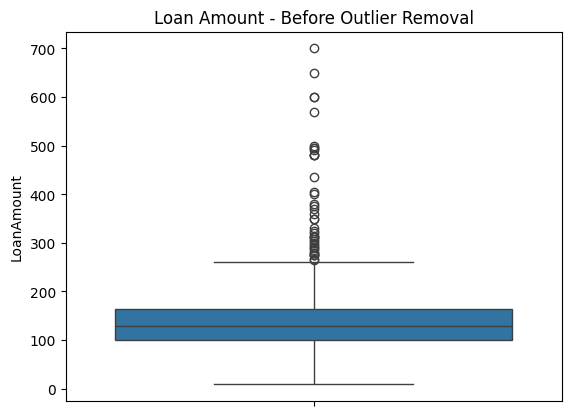

In [6]:
##  Step 3: Outlier Detection and Treatment
import seaborn as sns
import matplotlib.pyplot as plt

# Plot LoanAmount
sns.boxplot(df['LoanAmount'])
plt.title("Loan Amount - Before Outlier Removal")
plt.show()

# Cap extreme outliers using IQR method
Q1 = df['LoanAmount'].quantile(0.25)
Q3 = df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df['LoanAmount'] = df['LoanAmount'].apply(lambda x: upper_bound if x > upper_bound else x)


In [8]:
## Step 4: Encoding Categorical Variables
# Use Label Encoding for binary columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])        # Male=1, Female=0
df['Married'] = le.fit_transform(df['Married'])      # Yes=1, No=0
df['Education'] = le.fit_transform(df['Education'])  # Graduate=1, Not Graduate=0
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])  # Yes=1, No=0
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])  # Y=1, N=0

# For 'Dependents', treat '3+' as 3
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# One-hot encoding for 'Property_Area'
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)


In [10]:
    # Step 5: Feature Scaling
    from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale numeric columns
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,0.072991,-0.554487,-0.168041,0.273231,1.0,1,False,True
1,LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.168041,0.273231,1.0,0,False,False
2,LP001005,1,1,0,0,1,-0.393747,-0.554487,-1.280462,0.273231,1.0,1,False,True
3,LP001006,1,1,0,1,0,-0.462062,0.251980,-0.311579,0.273231,1.0,1,False,True
4,LP001008,1,0,0,0,0,0.097728,-0.554487,0.065209,0.273231,1.0,1,False,True
